#INDICACIONES : Para ejecutar los ejercicios vistos en clases , realizar una copia de este Google Colab o ejecutar las lineas de codigo en un Google Colab o entorno propio.

Para realizar la copia de este Google Colab , vas a la parte superior en "File", se abrirá un desplegable y se seleccionará el boton " Save a copy in Drive". Sobre ese nuevo Google Colab creado, si pueden ejecutar cambios.

Se pide no realizar cambios sobre este link original, solo en su propia copia creada.

In [2]:
# Basic regression to predict fuel efficiency
# Code is based on this tutorial: https://www.tensorflow.org/tutorials/keras/regression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # pip install pandas
import seaborn as sns
import missingno as msno

# # Make numpy printouts easier to read.
# np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
print(np.__version__)

2.14.0
1.23.5


# **1. Cargar .csv**

In [3]:
dataset = pd.read_csv('Pulsar.csv')
dataset.tail(10)

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
17888,98.726562,50.407823,0.565124,0.245231,0.570234,9.011285,22.018589,561.833787,0
17889,126.625000,55.721826,0.002946,-0.303218,0.534281,8.588882,23.913761,660.197035,0
17890,143.671875,45.302647,-0.045769,0.353643,5.173913,26.462345,5.706651,33.802613,0
17891,118.484375,50.608483,-0.029059,-0.027494,0.422241,8.086684,27.446113,830.638550,0
17892,96.000000,44.193113,0.388674,0.281344,1.871237,15.833746,9.634927,104.821623,0
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentences = {
    'I love my dog',
    'I love my car',
    'You love my dog',
    'You love my cat'
}
tokenizer = Tokenizer(num_words = 100, oov_token='<OOV>')  ## 100 mas frecuentes
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post', truncating='post', maxlen=5)
print(word_index)
print(sequences)
print(padded)

{'<OOV>': 1, 'love': 2, 'my': 3, 'i': 4, 'dog': 5, 'you': 6, 'car': 7, 'cat': 8}
[[4, 2, 3, 7], [4, 2, 3, 5], [6, 2, 3, 5], [6, 2, 3, 8]]
[[4 2 3 7 0]
 [4 2 3 5 0]
 [6 2 3 5 0]
 [6 2 3 8 0]]


# **2. USAR FUNCIONES**

In [5]:
def display_dataset(dataset,records):
  if records==0:
     return dataset.tail()
  else:
     return dataset.tail(records)

def validate_null(dataset):
  dataset.isna().sum() #Nan
  print('VISUALIZACION DE VALORES NULOS')
  msno.matrix(dataset)

def drop_null(dataset):
  # clean data, eliminar nulos deja en el data set solo los no nulos
  dataset = dataset.dropna()
  print('SE ELIMINARON VALORES NULOS')



In [6]:
display_dataset(dataset,10)


,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
17888,98.726562,50.407823,0.565124,0.245231,0.570234,9.011285,22.018589,561.833787,0
17889,126.625000,55.721826,0.002946,-0.303218,0.534281,8.588882,23.913761,660.197035,0
17890,143.671875,45.302647,-0.045769,0.353643,5.173913,26.462345,5.706651,33.802613,0
17891,118.484375,50.608483,-0.029059,-0.027494,0.422241,8.086684,27.446113,830.638550,0
17892,96.000000,44.193113,0.388674,0.281344,1.871237,15.833746,9.634927,104.821623,0
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


# **3. LIMPIEZA DE DATOS**

VISUALIZACION DE VALORES NULOS
SE ELIMINARON VALORES NULOS


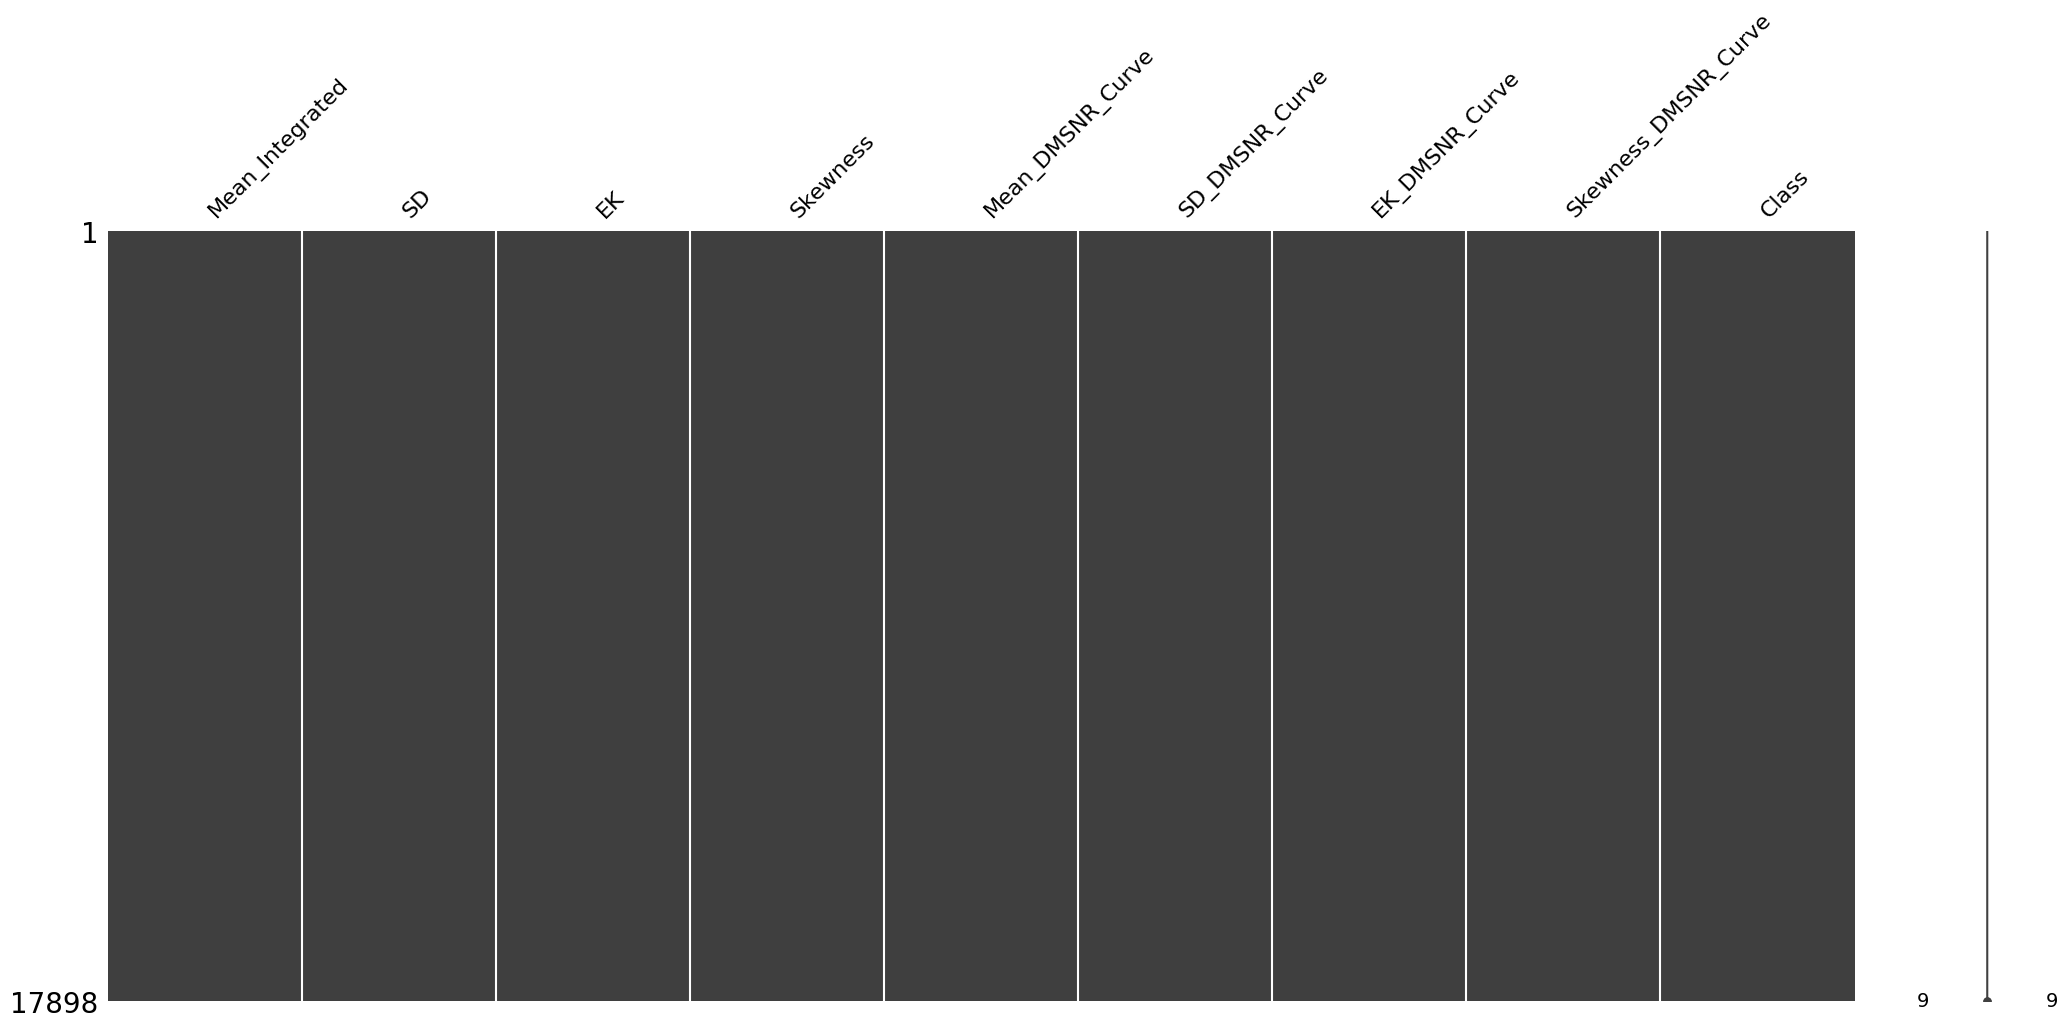

In [7]:
validate_null(dataset)
drop_null(dataset)

In [8]:
# convert categorical 'Origin' data into one-hot data
dataset['Tipo_estrella'] = dataset['Class'].map({1: 'Si', 0: 'No'})
print(dataset)

dataset = pd.get_dummies(dataset, columns=['Tipo_estrella'], prefix='', prefix_sep='')
print(dataset)

       Mean_Integrated         SD        EK  Skewness  Mean_DMSNR_Curve  \
0           140.562500  55.683782 -0.234571 -0.699648          3.199833   
1           102.507812  58.882430  0.465318 -0.515088          1.677258   
2           103.015625  39.341649  0.323328  1.051164          3.121237   
3           136.750000  57.178449 -0.068415 -0.636238          3.642977   
4            88.726562  40.672225  0.600866  1.123492          1.178930   
...                ...        ...       ...       ...               ...   
17893       136.429688  59.847421 -0.187846 -0.738123          1.296823   
17894       122.554688  49.485605  0.127978  0.323061         16.409699   
17895       119.335938  59.935939  0.159363 -0.743025         21.430602   
17896       114.507812  53.902400  0.201161 -0.024789          1.946488   
17897        57.062500  85.797340  1.406391  0.089520        188.306020   

       SD_DMSNR_Curve  EK_DMSNR_Curve  Skewness_DMSNR_Curve  Class  \
0           19.110426        

In [9]:
display_dataset(dataset,0 )

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class,No,Si
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0,1,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0,1,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0,1,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0,1,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0,1,0


In [10]:
# Split the data into train and test

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(17898, 11) (14318, 11) (3580, 11)


,count,mean,std,min,25%,50%,75%,max
Mean_Integrated,14318.0,111.076718,25.667571,5.812500,100.929688,115.105469,127.046875,190.421875
SD,14318.0,46.550077,6.822899,24.772042,42.407055,46.977559,51.036918,98.778911
EK,14318.0,0.478192,1.072770,-1.738021,0.026949,0.224016,0.473819,8.069522
Skewness,14318.0,1.784499,6.277860,-1.791886,-0.190602,0.196507,0.925124,68.101622
Mean_DMSNR_Curve,14318.0,12.727913,29.632155,0.213211,1.932483,2.798077,5.470318,222.421405
SD_DMSNR_Curve,14318.0,26.406667,19.549443,7.370432,14.457645,18.470136,28.481725,110.642211
EK_DMSNR_Curve,14318.0,8.289654,4.511528,-3.139270,5.774510,8.432818,10.675133,34.539844
Skewness_DMSNR_Curve,14318.0,104.582793,106.352681,-1.976976,34.786480,83.147625,138.329061,1191.000837
Class,14318.0,0.090166,0.286430,0.000000,0.000000,0.000000,0.000000,1.000000
No,14318.0,0.909834,0.286430,0.000000,1.000000,1.000000,1.000000,1.000000


# **4. ANALISIS DE DATOS**

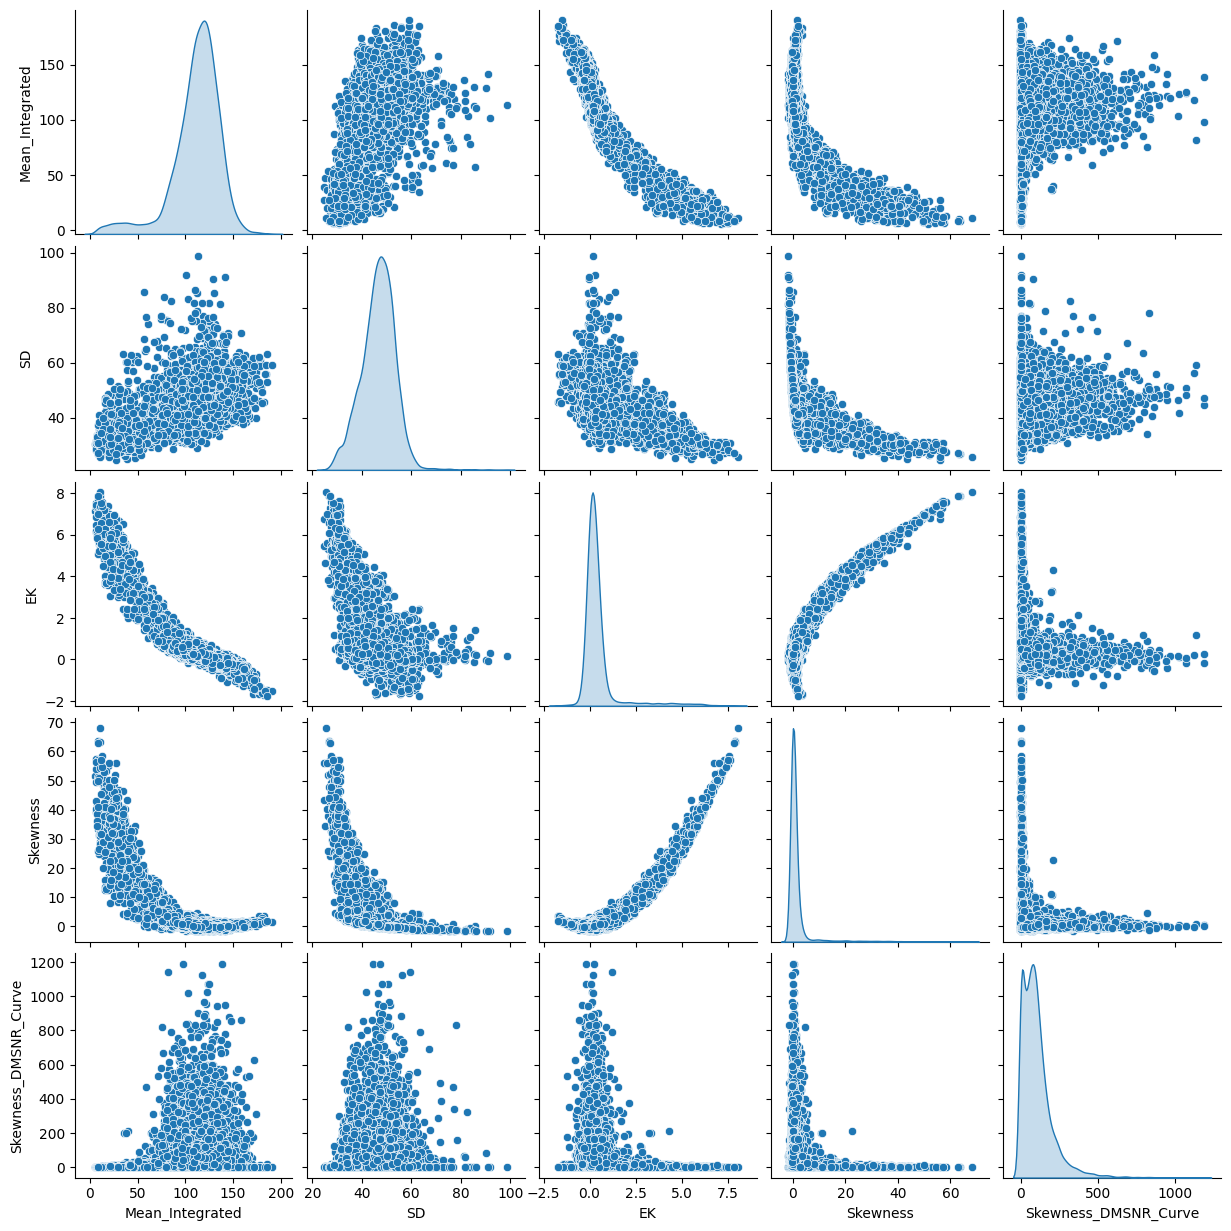

In [11]:
sns.pairplot(train_dataset[['Mean_Integrated', 'SD', 'EK', 'Skewness','Skewness_DMSNR_Curve']], diag_kind='kde')

# **5. TRAIN/VAL/TEST SPLIT**

In [12]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()



(17898, 11) (14318, 11) (3580, 11)


,count,mean,std,min,25%,50%,75%,max
Mean_Integrated,14318.0,111.076718,25.667571,5.812500,100.929688,115.105469,127.046875,190.421875
SD,14318.0,46.550077,6.822899,24.772042,42.407055,46.977559,51.036918,98.778911
EK,14318.0,0.478192,1.072770,-1.738021,0.026949,0.224016,0.473819,8.069522
Skewness,14318.0,1.784499,6.277860,-1.791886,-0.190602,0.196507,0.925124,68.101622
Mean_DMSNR_Curve,14318.0,12.727913,29.632155,0.213211,1.932483,2.798077,5.470318,222.421405
SD_DMSNR_Curve,14318.0,26.406667,19.549443,7.370432,14.457645,18.470136,28.481725,110.642211
EK_DMSNR_Curve,14318.0,8.289654,4.511528,-3.139270,5.774510,8.432818,10.675133,34.539844
Skewness_DMSNR_Curve,14318.0,104.582793,106.352681,-1.976976,34.786480,83.147625,138.329061,1191.000837
Class,14318.0,0.090166,0.286430,0.000000,0.000000,0.000000,0.000000,1.000000
No,14318.0,0.909834,0.286430,0.000000,1.000000,1.000000,1.000000,1.000000


In [14]:

# split features from labels
train_features = train_dataset.copy() # X train
test_features = test_dataset.copy() # X testeo

train_labels = train_features.pop('Mean_Integrated') ## y _train
test_labels = test_features.pop('Mean_Integrated')   #$ Y - test

# 7. **NORMALIZAR**

In [15]:
## scaler
# Normalize
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())

[[4.6550064e+01 4.7819233e-01 1.7844988e+00 1.2727917e+01 2.6406658e+01
  8.2896528e+00 1.0458280e+02 9.0166256e-02 9.0983361e-01 9.0166256e-02]]
[[4.6548660e+01 1.1507543e+00 3.9408760e+01 8.7800250e+02 3.8215384e+02
  2.0352470e+01 1.1310100e+04 8.2036421e-02 8.2036406e-02 8.2036421e-02]]


In [16]:
# When the layer is called it returns the input data, with each feature independently normalized:
# (input-mean)/stddev
first = np.array(train_features[:1])
print('First example:', first)
print('Normalized:', normalizer(first).numpy())


First example: [[ 45.75907566   0.23169775   0.22715643   2.27006689  14.34301971
    9.5003683  117.0577236    0.           1.           0.        ]]
Normalized: [[-0.11593559 -0.22978202 -0.24807769 -0.3529348  -0.6171052   0.2683697
   0.11730178 -0.31480432  0.31480482 -0.31480432]]


# **6. SELECCIONAR VARIABLES**

In [17]:
# Regression
 # 1. Normalize the input horsepower
 # 2. Apply a linear transformation (y = m*x+b) to produce 1 output using layers.Dense

feature = 'Skewness'
single_feature = np.array(train_features[feature])
print(single_feature.shape, train_features.shape)

# Normalization
single_feature_normalizer = layers.Normalization(input_shape=[1,], axis=None)

# adapt to the data
single_feature_normalizer.adapt(single_feature)

(14318,) (14318, 10)


In [18]:
# Sequential model
horsepower_model = keras.models.Sequential([
    single_feature_normalizer,
    layers.Dense(units=1) # Linear Model
])


In [19]:

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [20]:
# loss and optimizer
loss = keras.losses.MeanAbsoluteError() # MeanSquaredError J
optim = keras.optimizers.SGD(lr=0.1)

horsepower_model.compile(optimizer=optim, loss=loss)

# **9. ENTRENAMIENTO**

In [21]:
%%time
history = horsepower_model.fit(
    train_features['Skewness'],
    train_labels,
    epochs=20,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/20
358/358 [==============================] - 3s 5ms/step - loss: 109.4771 - val_loss: 106.7575
Epoch 2/20
358/358 [==============================] - 1s 2ms/step - loss: 105.8969 - val_loss: 103.1778
Epoch 3/20
358/358 [==============================] - 1s 2ms/step - loss: 102.3168 - val_loss: 99.5981
Epoch 4/20
358/358 [==============================] - 1s 2ms/step - loss: 98.7371 - val_loss: 96.0223
Epoch 5/20
358/358 [==============================] - 1s 2ms/step - loss: 95.1710 - val_loss: 92.4758
Epoch 6/20
358/358 [==============================] - 1s 2ms/step - loss: 91.6321 - val_loss: 88.9541
Epoch 7/20
358/358 [==============================] - 1s 2ms/step - loss: 88.1174 - val_loss: 85.4515
Epoch 8/20
358/358 [==============================] - 1s 2ms/step - loss: 84.6209 - val_loss: 81.9701
Epoch 9/20
358/358 [==============================] - 1s 2ms/step - loss: 81.1431 - val_loss: 78.5066
Epoch 10/20
358/358 [==============================] - 1s 2ms/step - loss: 77

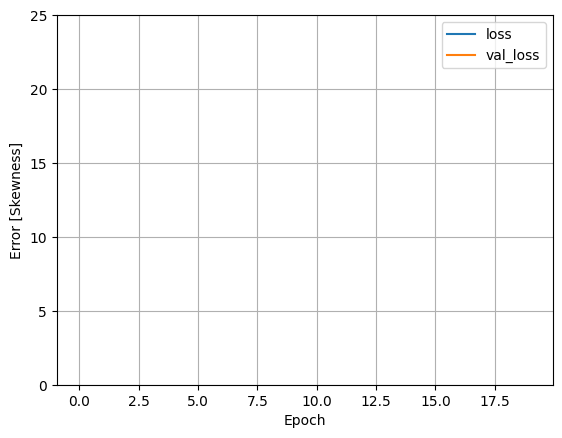

In [22]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 25])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Skewness]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

# **10. TESTEAR MODELO**

In [23]:

test_results = {}
print(test_features.shape)

test_results['Skewness_model'] = horsepower_model.evaluate(
    test_features['Skewness'],
    test_labels, verbose=1)

(3580, 10)
112/112 [==============================] - 0s 1ms/step - loss: 42.2285


In [28]:
# predict and plot
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


In [25]:
def plot_horsepower(x, y):
  plt.scatter(train_features['Skewness'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Skewness')
  plt.ylabel('Mean_Integrated')
  plt.legend()

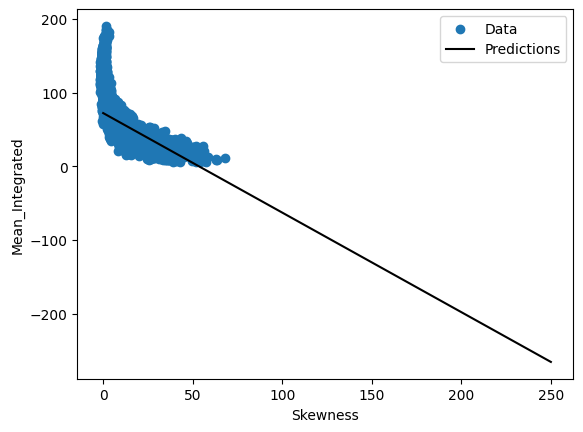

In [26]:
plot_horsepower(x, y)


# **11. GUARDAR MODELO**

In [27]:
horsepower_model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **12. GUARDAR TOKENIZADOR**

In [ ]:
import pickle
tokenizer_filename='tokenizer.pkl'
with open(tokenizer_filename, 'wb') as f:
  pickle.dump(tokenizer,f)